In [243]:
import pandas as pd
from SQL import create_db_connection, execute_query
import matplotlib.pyplot as plt
import h5py
import datetime
import numpy as np
import geopandas as gpd
from netCDF4 import Dataset
import os


from shapely.geometry import Point, Polygon

In [242]:
df = pd.read_fwf("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/flight.rpt")
df

,TIME,BAR ALT,MBS,AIRT,DRAD,LAT,LON,GPS ALT
0,15:28:24,4396.0,872.70,22.3,32.7,34-29.4,-104-13.1,1264.0
1,15:29:24,5509.0,836.03,18.6,30.8,34-29.4,-104-13.2,1507.0
2,15:30:24,6538.0,803.26,19.1,29.4,34-29.5,-104-13.1,1864.0
3,15:31:24,7560.0,771.79,16.8,28.5,34-29.7,-104-13.0,2228.0
4,15:32:24,8528.0,742.91,15.1,27.2,34-29.9,-104-12.9,2523.0
...,...,...,...,...,...,...,...,...
274,20:02:47,14255.0,589.76,5.5,22.4,34-30.8,-105-53.0,4506.0
275,20:03:47,13190.0,616.04,6.5,24.4,34-30.5,-105-53.1,4159.0
276,20:04:47,12188.0,641.67,7.6,25.1,34-30.2,-105-53.0,3836.0
277,20:05:47,11013.0,672.82,10.3,26.0,34-30.1,-105-53.0,3602.0


In [36]:
def convert(string):
    nums = string.split('-')
    if len(nums) >2 :
        nums = nums[1:]
        val = '-'+nums[0]+'.'+nums[1][-4:-2] +nums[1][-1]
    else:
        val = nums[0]+'.'+nums[1][-4:-2] +nums[1][-1]
    return(float(val))
    
df['LAT'] = df['LAT'].apply(lambda x: convert(x))
df['LON'] = df['LON'].apply(lambda x: convert(x))

In [39]:
geometry = [Point(xy) for xy in zip(df["LON"],df['LAT'])]

In [52]:
df['geometry'] = geometry
crs = {'init':'epsg:4326'}

In [54]:
geo_df = gpd.GeoDataFrame(df,geometry = geometry)

In [56]:
print(geo_df.head())

       TIME  BAR ALT     MBS  AIRT  DRAD     LAT      LON  GPS ALT  \
0  15:28:24   4396.0  872.70  22.3  32.7  34.294 -104.131   1264.0   
1  15:29:24   5509.0  836.03  18.6  30.8  34.294 -104.132   1507.0   
2  15:30:24   6538.0  803.26  19.1  29.4  34.295 -104.131   1864.0   
3  15:31:24   7560.0  771.79  16.8  28.5  34.297 -104.130   2228.0   
4  15:32:24   8528.0  742.91  15.1  27.2  34.299 -104.129   2523.0   

                      geometry  
0  POINT (-104.13100 34.29400)  
1  POINT (-104.13200 34.29400)  
2  POINT (-104.13100 34.29500)  
3  POINT (-104.13000 34.29700)  
4  POINT (-104.12900 34.29900)  


In [101]:
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [103]:
print(cities.head())

           name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino  POINT (12.44177 43.93610)
2         Vaduz   POINT (9.51667 47.13372)
3    Luxembourg   POINT (6.13000 49.61166)
4       Palikir  POINT (158.14997 6.91664)


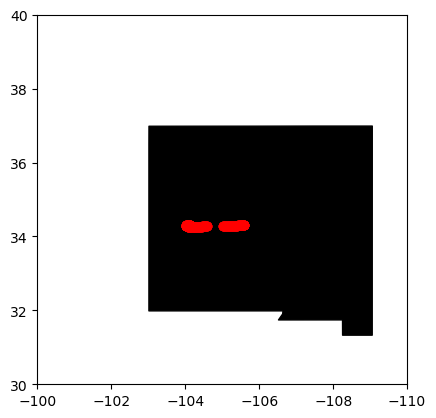

In [265]:

ax = US_states[US_states.iso_3166_2 == 'US-NM'].plot(
    color='black', edgecolor='black')

geo_df.plot(ax=ax, color='red')

plt.xlim(-100,-110)
plt.ylim(30,40)
plt.show()

In [129]:
import xarray as xr
import requests
import netCDF4
import boto3
import boto3
from botocore import UNSIGNED
from botocore.config import Config

In [286]:
bucket_name = 'noaa-goes16'
product = 'ABI-L1b-RadC'
year = 2021
day_of_year = 242
hour = 15
band = 12

fp ='noaa-goes16/ABI-L1b-RadC/2021/'+str(day_of_year) +'/'+str(hour)
f = fp  +'/OR_'+product+'M6C'+str(band)
print(name)

noaa-goes16/ABI-L1b-RadC/2021/242/15/OR_ABI-L1b-RadCM6C14


In [293]:
import s3fs

# Use the anonymous credentials to access public data
fs = s3fs.S3FileSystem(anon=True)

# List contents of GOES-16 bucket.
names = fs.ls(fp)
names[0]

'noaa-goes16/ABI-L1b-RadC/2021/242/15/OR_ABI-L1b-RadC-M6C01_G16_s20212421501171_e20212421503544_c20212421503584.nc'

In [294]:
# Download the first file, and rename it the same name (without the directory structure)
name = names[0]
fn = '/Users/kirahart/Dropbox/Research/balloon/telemetry_data/GOES/' + name.split('/')[-1]
fs.get(name,fn)

In [284]:
from netCDF4 import Dataset

In [295]:
g16nc = Dataset(fn, 'r')
radiance_1 = g16nc.variables['Rad'][:]
proj_info = g16nc.variables['goes_imager_projection']

print(proj_info)
g16nc.close()
g16nc = None



<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


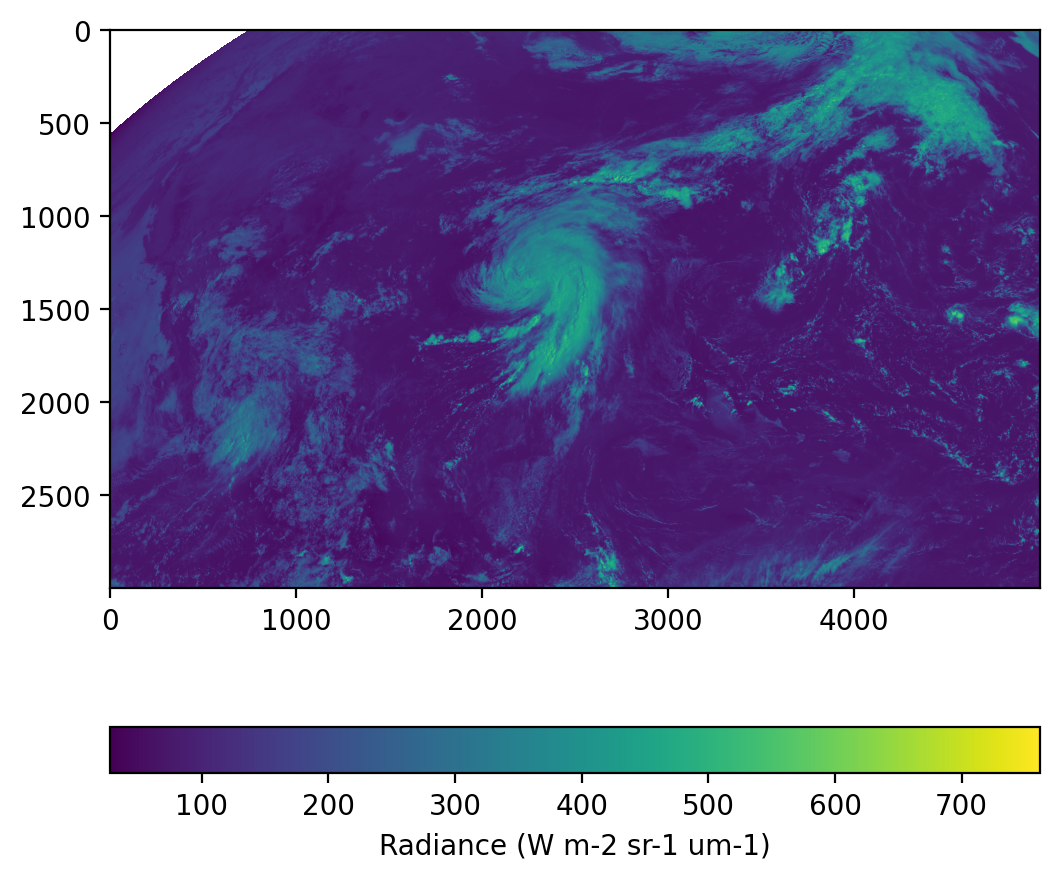

In [296]:
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(radiance_1)
cb = fig.colorbar(im, orientation='horizontal')
cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()

In [297]:
#from mpl_toolkits.basemap import Basemap, cm

def lat_lon_reproj(file):
    
    g16_data_file = file # select .nc file
    
    # designate dataset
    g16nc = Dataset(g16_data_file, 'r')
    var_names = [ii for ii in g16nc.variables]
    var_name = var_names[0]
    try:
        band_id = g16nc.variables['band_id'][:]
        band_id = ' (Band: {},'.format(band_id[0])
        band_wavelength = g16nc.variables['band_wavelength']
        band_wavelength_units = band_wavelength.units
        band_wavelength_units = '{})'.format(band_wavelength_units)
        band_wavelength = ' {0:.2f} '.format(band_wavelength[:][0])
        print('Band ID: {}'.format(band_id))
        print('Band Wavelength: {} {}'.format(band_wavelength,band_wavelength_units))
    except:
        band_id = ''
        band_wavelength = ''
        band_wavelength_units = ''

    # GOES-R projection info and retrieving relevant constants
    proj_info = g16nc.variables['goes_imager_projection']
    lon_origin = proj_info.longitude_of_projection_origin
    H = proj_info.perspective_point_height+proj_info.semi_major_axis
    r_eq = proj_info.semi_major_axis
    r_pol = proj_info.semi_minor_axis

    # grid info
    lat_rad_1d = g16nc.variables['x'][:]
    lon_rad_1d = g16nc.variables['y'][:]

    # data info    
    data = g16nc.variables[var_name][:]
    data_units = g16nc.variables[var_name].units
    data_time_grab = ((g16nc.time_coverage_end).replace('T',' ')).replace('Z','')
    data_long_name = g16nc.variables[var_name].long_name
    
    # close file when finished
    g16nc.close()
    g16nc = None

    # create meshgrid filled with radian angles
    lat_rad,lon_rad = np.meshgrid(lat_rad_1d,lon_rad_1d)

    # lat/lon calc routine from satellite radian angle vectors

    lambda_0 = (lon_origin*np.pi)/180.0

    a_var = np.power(np.sin(lat_rad),2.0) + (np.power(np.cos(lat_rad),2.0)*(np.power(np.cos(lon_rad),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(lon_rad),2.0))))
    b_var = -2.0*H*np.cos(lat_rad)*np.cos(lon_rad)
    c_var = (H**2.0)-(r_eq**2.0)

    r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

    s_x = r_s*np.cos(lat_rad)*np.cos(lon_rad)
    s_y = - r_s*np.sin(lat_rad)
    s_z = r_s*np.cos(lat_rad)*np.sin(lon_rad)

    lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
    lon = (lambda_0 - np.arctan(s_y/(H-s_x)))*(180.0/np.pi)


    # print test coordinates
    print('{} N, {} W'.format(lat[318,1849],abs(lon[318,1849])))

    return lon,lat,data,data_units,data_time_grab,data_long_name,band_id,band_wavelength,band_wavelength_units,var_name



In [298]:
nc_folder = fn # define folder where .nc files are located

file_indx = 15 # be sure to pick the correct file. Make sure the file is not too big either,
# some of the bands create large files (stick to band 7-16)

# main data grab from function above
lon,lat,data,data_units,data_time_grab,data_long_name,band_id,band_wavelength,band_units,var_name = lat_lon_reproj(fn)



Band ID:  (Band: 1,
Band Wavelength:  0.47  um)


/Users/kirahart/opt/anaconda3/envs/database/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt
/Users/kirahart/opt/anaconda3/envs/database/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in sqrt


46.14130401611328 N, 100.52049255371094 W


/Users/kirahart/opt/anaconda3/envs/database/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  """Entry point for launching an IPython kernel.


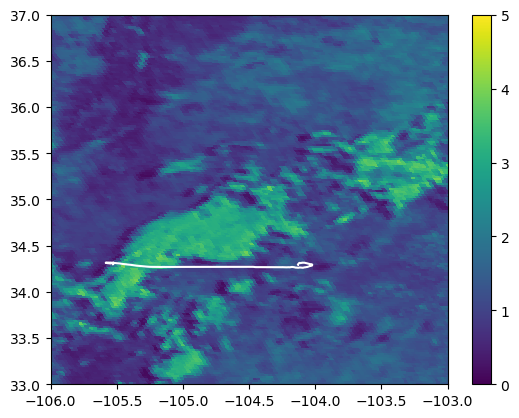

In [270]:
plt.pcolormesh(lon.data,lat.data,data,shading = 'auto')
plt.xlim(-106,-103)
plt.ylim(33,37)
plt.colorbar()
plt.clim(0,5)
plt.plot(geo_df['LON'],geo_df['LAT'],'w')
plt.show()